# PROJECT 
# Ayush Ohlyan

# PART A
The municipal corporation of a city needs extra money for its development plans for the city. The mayor of the city proposes a new  tax on businesses that is proportional to the amount spent to lease property in the city. Find out the revenue that  tax will generate.  businesses in the city lease the property.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns

# 1. Load The Data

In [4]:
tax=pd.read_csv(r'C:\Users\ayush\Downloads\property_tax.csv')
tax

,Total Lease Cost
0,329959
1,298073
2,2820213
3,883773
4,359745
...,...
218,979391
219,1217664
220,383177
221,860709


# 2. Describe The Data

In [15]:
tax.describe()

,Total Lease Cost
count,2.230000e+02
mean,4.786035e+05
std,5.353426e+05
min,2.040900e+04
25%,1.084355e+05
50%,2.905590e+05
75%,6.624920e+05
max,2.820213e+06


Information of the Data:-

In [24]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total Lease Cost  223 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


To obtain the confidence interval for the amount raised by the tax, we need the confidence interval for mu, the average cost of lease

There are 4500 businesses in the city that lease property

By multiplying the 95% CI for mu by 1% of 4500, we can find the 95% CI for total income

Min and Max Values of the property tax are:-

In [25]:
print('Minimum values of property tax:-',tax['Total Lease Cost'].min())
print('Maximum values of property tax:-',tax['Total Lease Cost'].max())

Minimum values of property tax:- 20409
Maximum values of property tax:- 2820213


Plot the Box Plot and Histogram

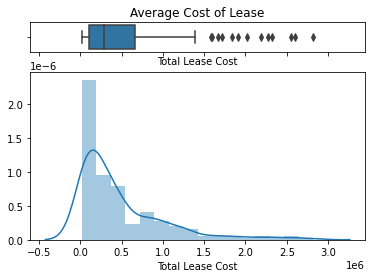

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(tax["Total Lease Cost"],ax=ax_box).set(title='Average Cost of Lease')
sns.distplot(tax["Total Lease Cost"],ax=ax_hist)
plt.show()

The histogram of the lease cost is skewed. One of the cost is nearly $3,000,000 per year where as majority of the costs are far smaller

In this case, we will use the 95% confidence interval of mu. 

Before that we shall calculate important summary statistics of the lease cost:-

In [27]:
mean = tax['Total Lease Cost'].mean()
sdev = tax['Total Lease Cost'].std()
n = tax['Total Lease Cost'].count()
K3 = tax['Total Lease Cost'].skew()
K4 = tax['Total Lease Cost'].kurtosis()
print('Mean is:-',mean)
print('Standard deviation is:-',sdev)
print('Count is:-',n)
print('Skewness is:-',K3)
print('Kurtosis is:-',K4)
se= sdev/np.sqrt(n)
print('se is:-',se)

Mean is:- 478603.4798206278
Standard deviation is:- 535342.5637301835
Count is:- 223
Skewness is:- 1.953472329294872
Kurtosis is:- 4.137508828414167
se is:- 35849.18962885723


# 3.Check the Simple Random Condition and sample size condition

SRS Condition: The sample consists of less than 10% of the population of the lease. Population size is 4500 whereas randomly chosen sample size is 223.

Sample Size Condition: The sample size is n=223.10K(2,3)≈38 and 10|K4|≈41, this condition is met.

# 4. Calculate t(α/2,n−1)

In [28]:
tval = t.ppf(1.95/2.,n-1)
tval

1.9707073953190277

Value of t(α/2,n−1)=1.97

# 5. Calculate 95% CI

In [29]:
print(mean + se*tval)
print(mean - se*tval)

549251.742938411
407955.21670284466


The 95% CI is (407955.22 to $549251.74)

# 6. Calculate the tax that will be collected

1% tax for each business will be between 4079.55 to 5492.52.

1% tax for 4500 business will be between 24716328.43 to 18357984.75

In [30]:
print((mean + se*tval)*0.01*4500)
print((mean - se*tval)*0.01*4500)

24716328.432228494
18357984.751628008


# 7. Summarize the results

We are confident that the average cost of the lease is between [407955.22 to 549251.74]

On average, we can be 95% confident that the tax will be between [4079.55 to 5492.52] per business

We can be 95% confident that the total tax will be between [24716328.43 to 18357984.75]

# PART B

The municipal corporation was able to collect a good amount of revenue which was properly utilized for the welfare scheme. The mayor of the city was happy and decided to run for reelection. A local newspaper conducted a pre-poll survey and collected the data from a sample of 400 registered voters. Only 40% of the registered voters who participated in the survey wanted to see him as the mayor again. What do the numbers indicate about the mood of the voters in the city, Assume that to win the election a candidate requires more than 50% of the casted votes? 

# 1. What is the parameter of interest?

The parameter of the interest would be proportion in the population of the registered voters who think that the mayor is doing a good job. We assume that the data reported in the news is a random sample from this population. In this case,95% z-interval to p is used to summarize what we can conclude about p from the sample.

# 2. Check the SRS and Sample Size Condition

SRS Condition: We assume that the pollsters used the simple random sample. The n is much lesser than the 10% of the population

Sample Size Condition: Both np and n(1-p) are larger than 10

# 3. Estimate Standard Error

The estimated standard error is:

     se(p)=sqrt(p(1-p)/n)
              
       =sqrt(0.4x0.6/100)=0.0245

# 4.  Calculate 95% z-interval for the parameter

First we calculate z(0.025)

In [32]:
from scipy.stats import norm
norm.ppf(1.95/2)

1.959963984540054

Therefore,z(0.025)=1.96

 [0.40-1.96(0.0245) to 0.04+1.96(0.0245)] = [0.352 to 0.448]
 
 Alternatively, we can calculate as follows:

In [34]:
import statsmodels.stats.proportion as proportion
ci_low, ci_upp = proportion.proportion_confint(160,400,alpha=0.05, method="normal")
ci_low, ci_upp

(0.3519908832364469, 0.44800911676355315)

# 5. Summarize the results

We can tell the mayor that he can be 95% confident that between 35% and 45% of the registered voters think that he is doing a good job. Fewer than half are happy with him. So to win elections, he need to convince more voters

# END OF THE PROJECT 

# THANK YOU